<a href="https://colab.research.google.com/github/AnjaliRana18/Breast_Cancer_Classification/blob/main/ML_dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [ ]:
#loading the data
from google.colab import files
upload = files.upload()

Saving breastCancer.csv to breastCancer.csv


In [ ]:
df = pd.read_csv('breastCancer.csv')
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
#Data set 
df.head(5)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
#Count the no. of rows and Columns in the dataset
df.shape

(699, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Data preprocessing
1. Data Cleaning

2 --> Benign

4 --> Malignant

In [ ]:
#Get a count of the  number of Malignant (4) and Benign(2) cells
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [ ]:
#to change the Malignant(4) to (1) and Benign(2) to (0)
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,10] = labelencoder_Y.fit_transform(df.iloc[:,10].values)

0 --> Benign

1 --> Malignant

In [ ]:
#Get a count of the  number of Malignant (1) and Benign(0) cells
df['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [ ]:
#Replace ? with nan
df = df.replace('?', np.nan)

In [ ]:
#Count of the number of empty(NaN,NAN, na) values in each column
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [ ]:
#drop the rows having missing values
df = df.dropna()

In [ ]:
#count no. of columns and rows in the dataset
df.shape

(683, 11)

In [ ]:
#attribute bare_nucleoli is of object type converting it to int of 64 bit type
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [ ]:
#get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   clump_thickness    683 non-null    int64
 2   size_uniformity    683 non-null    int64
 3   shape_uniformity   683 non-null    int64
 4   marginal_adhesion  683 non-null    int64
 5   epithelial_size    683 non-null    int64
 6   bare_nucleoli      683 non-null    int64
 7   bland_chromatin    683 non-null    int64
 8   normal_nucleoli    683 non-null    int64
 9   mitoses            683 non-null    int64
 10  class              683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
#drop the column with name = 'id'
df = df.drop('id',axis=1)
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
#checking duplicates value
print(df.duplicated().sum())

234


In [ ]:
#duplicates rows in the dataframe
duplicate = df[df.duplicated()]
duplicate

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
28,2,1,1,1,2,1,2,1,1,0
35,2,1,1,1,2,1,2,1,1,0
48,4,1,1,3,2,1,3,1,1,0
64,1,1,1,1,2,1,2,1,1,0
66,4,1,1,1,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,0
688,4,1,1,1,2,1,1,1,1,0
690,1,1,1,3,2,1,1,1,1,0
692,3,1,1,1,2,1,1,1,1,0


In [ ]:
#deleting duplicates rows in the dataset
df = df.drop_duplicates()

In [ ]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,0
694,3,1,1,1,3,2,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
#get the new Count the no. of rows and Columns in the dataset
df.shape

(449, 10)

In [ ]:
#Get the correlation of the columns
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.570750,0.584082,0.379143,0.429917,0.508838,0.485863,0.444267,0.294359,0.670230
size_uniformity,0.570750,1.000000,0.876916,0.638499,0.689472,0.590451,0.710705,0.650262,0.403411,0.758697
shape_uniformity,0.584082,0.876916,1.000000,0.612859,0.650156,0.618310,0.684466,0.650739,0.381447,0.759500
marginal_adhesion,0.379143,0.638499,0.612859,1.000000,0.517930,0.590790,0.610571,0.510035,0.356659,0.630415
epithelial_size,0.429917,0.689472,0.650156,0.517930,1.000000,0.479915,0.554047,0.555774,0.434059,0.611432
bare_nucleoli,0.508838,0.590451,0.618310,0.590790,0.479915,1.000000,0.607716,0.478238,0.258691,0.760278
bland_chromatin,0.485863,0.710705,0.684466,0.610571,0.554047,0.607716,1.000000,0.604527,0.278639,0.706738
normal_nucleoli,0.444267,0.650262,0.650739,0.510035,0.555774,0.478238,0.604527,1.000000,0.373095,0.645257
mitoses,0.294359,0.403411,0.381447,0.356659,0.434059,0.258691,0.278639,0.373095,1.000000,0.357184
class,0.670230,0.758697,0.759500,0.630415,0.611432,0.760278,0.706738,0.645257,0.357184,1.000000


In [ ]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,0.525612
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.499901
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


DATA VISUALIZATION

In [ ]:
#Get a count of the  number of Malignant (1) and Benign(0) cells
df['class'].value_counts()

1    236
0    213
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


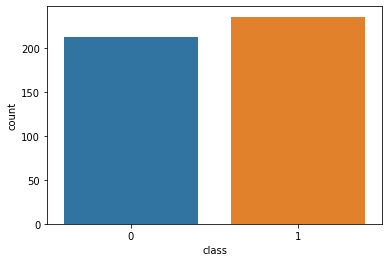

In [ ]:
#Visualize the count
sns.countplot(df['class'],label='count')

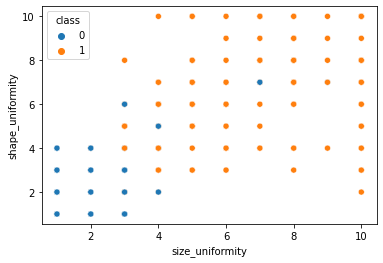

In [ ]:
#Scatter graph between size_uniformity and shape_uniformity
sns.scatterplot(x=df['size_uniformity'],y=df['shape_uniformity'],hue=df['class'])

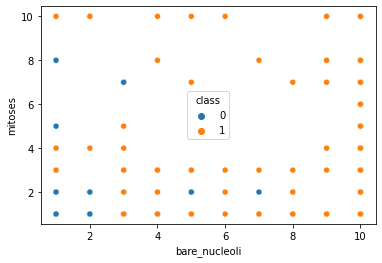

In [ ]:
#scatter graph between bare_nucleoli and mitosis
sns.scatterplot(x=df['bare_nucleoli'],y=df['mitoses'],hue=df['class'])

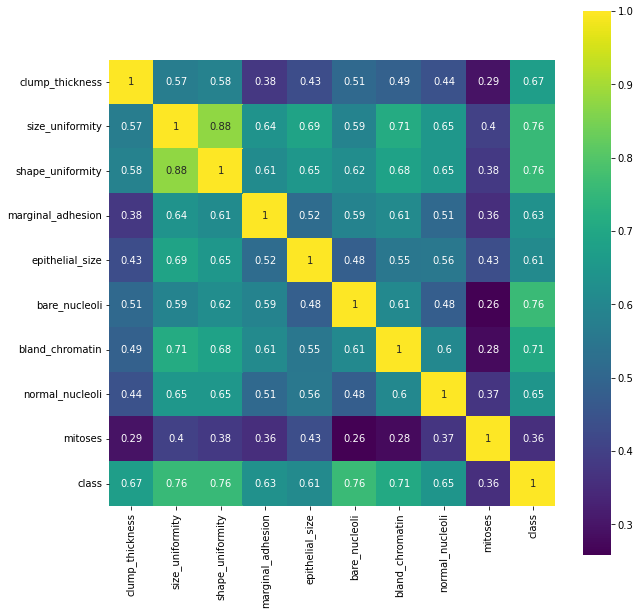

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')

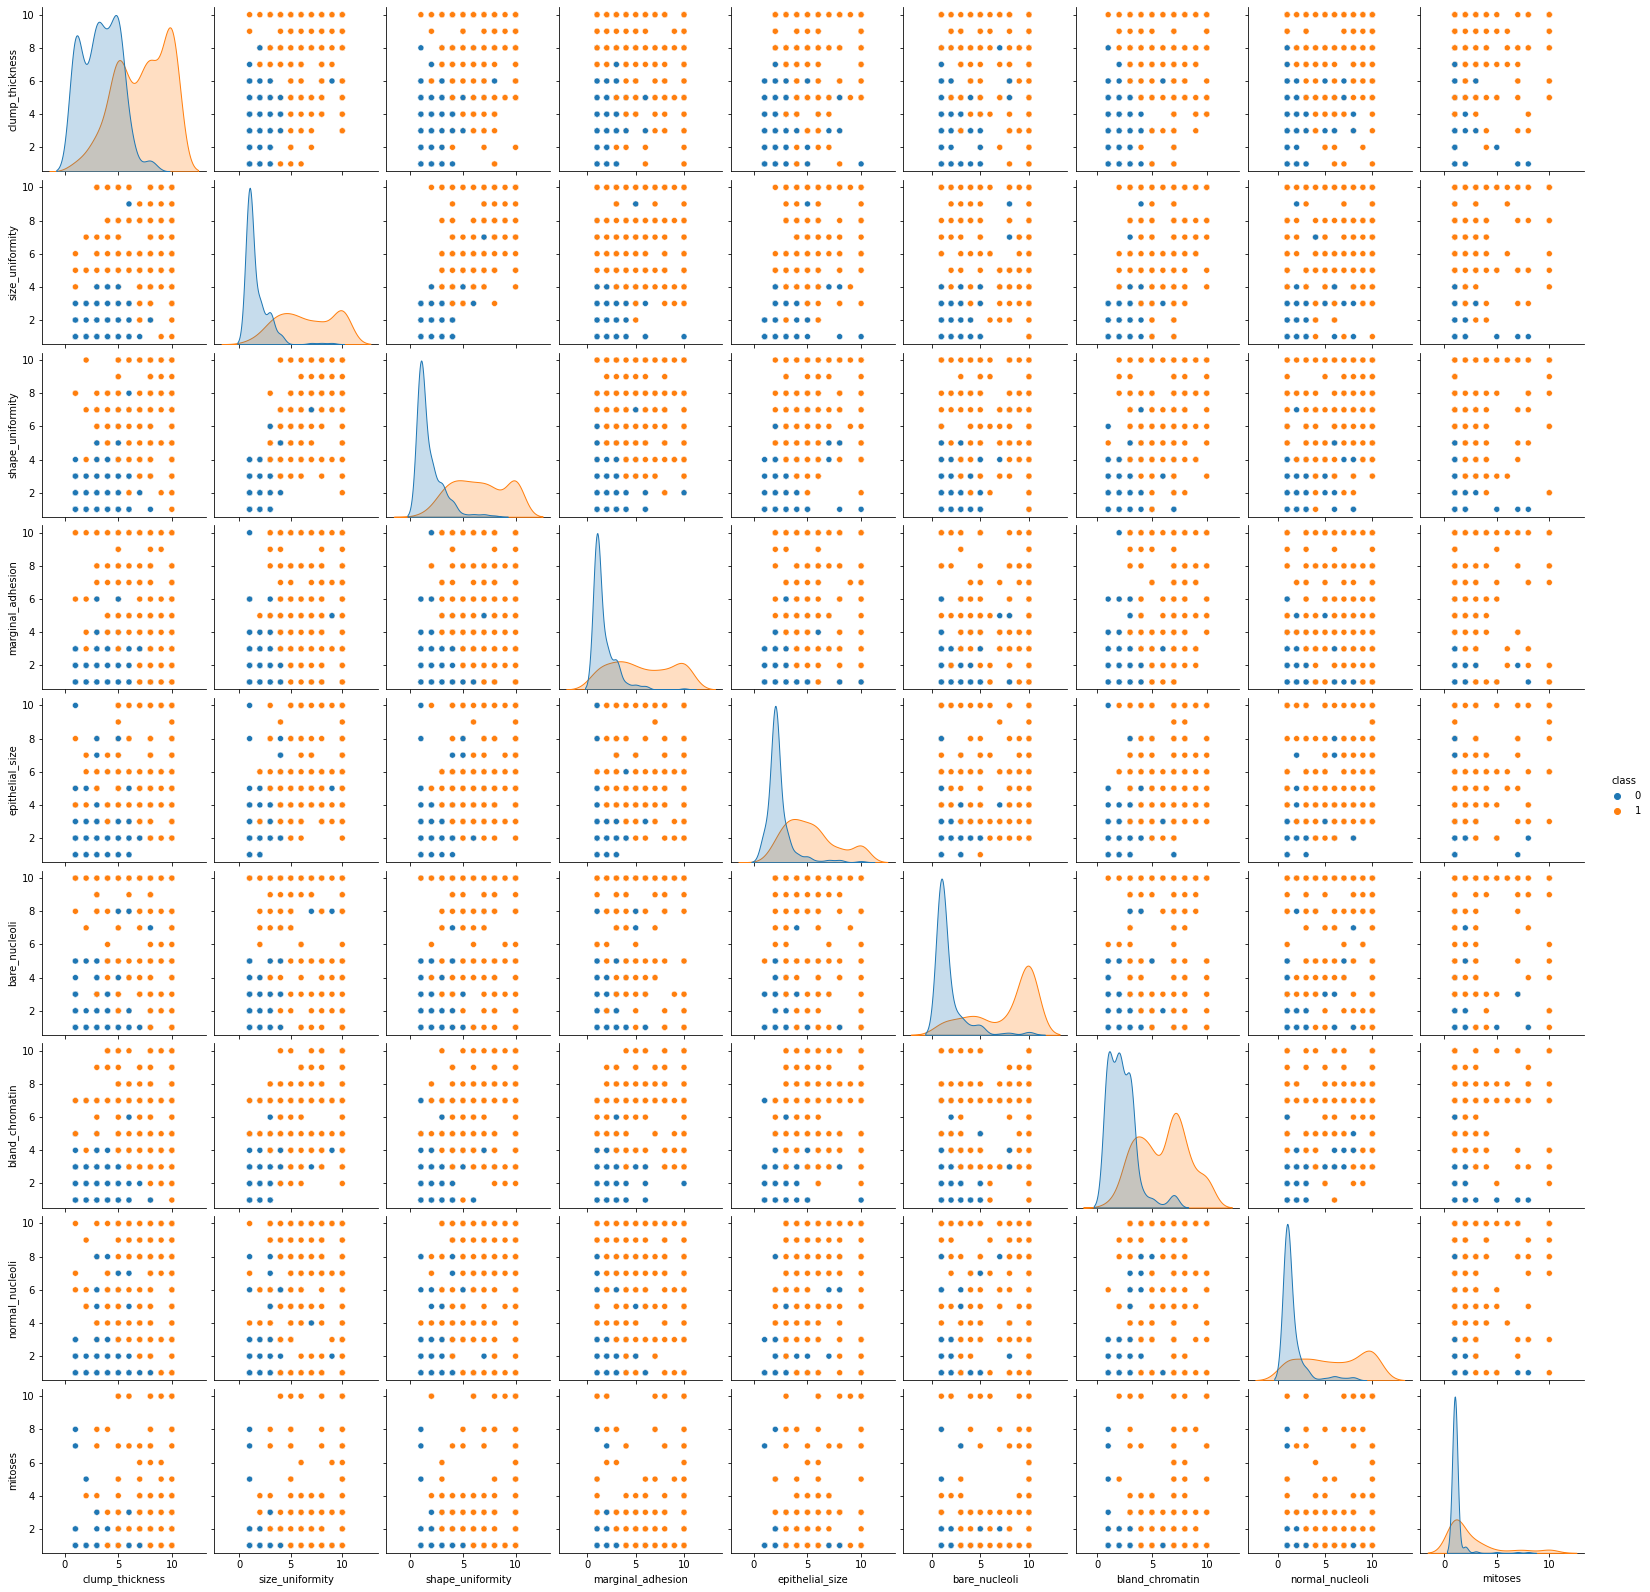

In [ ]:
#create a pair plot
sns.pairplot(df, hue='class', diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7987d47c10>,
      dtype=object)

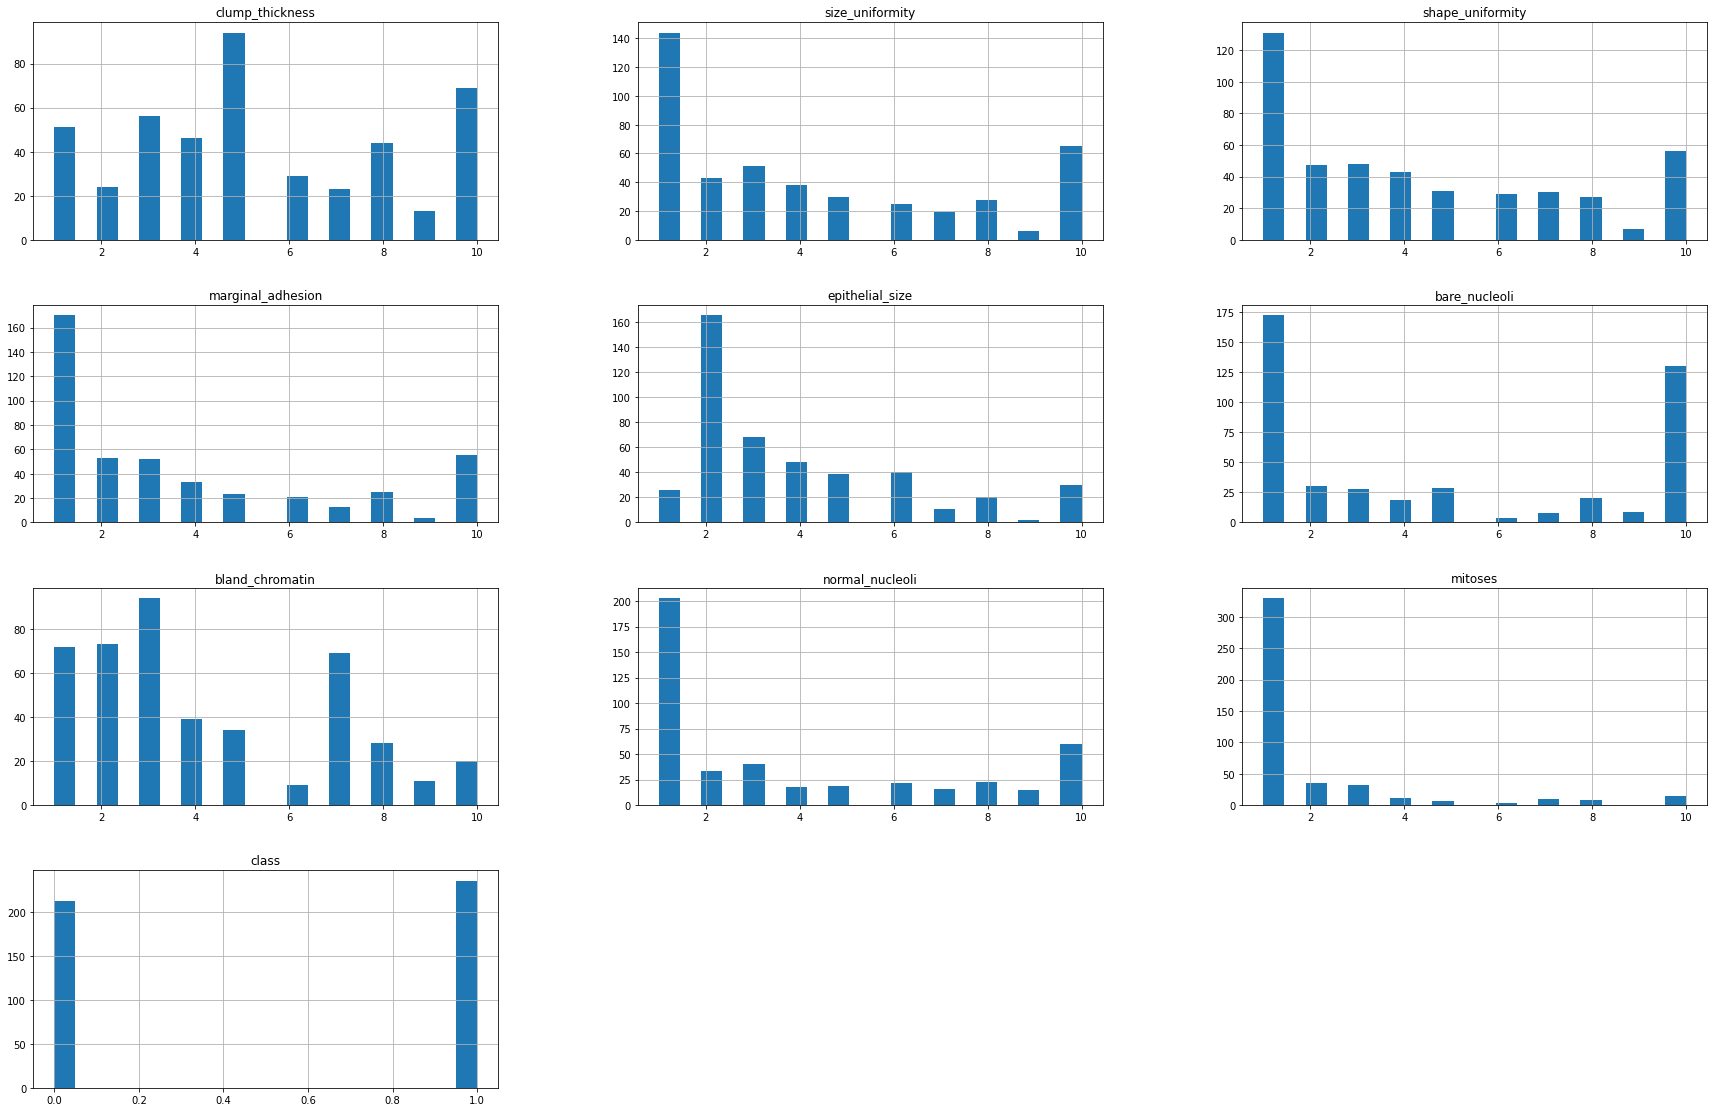

In [ ]:
df.hist(bins=20,figsize=(30,30), layout=(6,3))

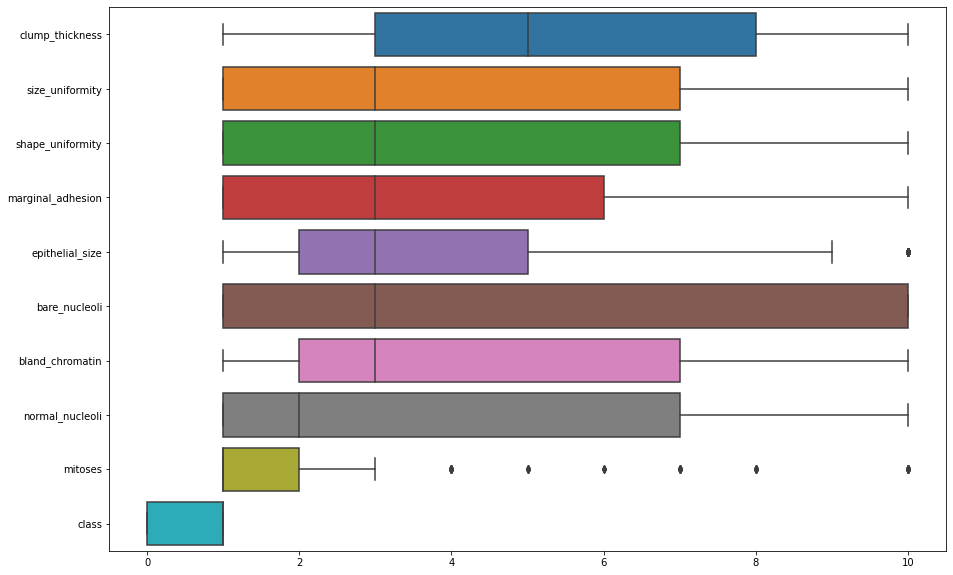

In [ ]:
#for Outliers
plt.figure(figsize = (15,10))
sns.boxplot(data = df, orient='h')

In [ ]:
df1 = df
df1

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,0
694,3,1,1,1,3,2,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
#download the cleaned dataset
df.to_csv(r'cleandata.csv', index = False)
files.download('cleandata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>